# Problem Statement 10

In [55]:
import pandas as pd

# Load the hospital data from CSV
hospital_data = pd.read_csv('hospitals.csv')

# Display the first few rows of the dataset to understand its structure
hospital_data.head()
# Load the metadata to understand the header acronyms
metadata = pd.read_csv('metadata.csv')

# Display the metadata to check the acronyms and their full forms
metadata.head()
# Create a dictionary to map acronyms to their full forms
acronyms_mapping = {
    'PHC': 'Number of Primary Health Centers(PHCs)',
    'CHC': 'Community Health Centers(CHCs)',
    'SDH':'Sub-District/Divisional Hospital(SDHs)',
    'DH':'District Hospital(DHs)'

}

# Rename the headers based on the acronym mapping and missing first header
hospital_data.columns = ['State/Ut'] + [acronyms_mapping.get(col, col) for col in hospital_data.columns[1:]]

# Display the first few rows after renaming headers
hospital_data.head()
# Ensure consistent formatting of headers (for example, Title Case)
hospital_data.columns = [col.title() for col in hospital_data.columns]

# Display the first few rows with updated and uniform headers
hospital_data.head()

,State/Ut,Number Of Primary Health Centers(Phcs),Community Health Centers(Chcs),Sub-District/Divisional Hospital(Sdhs),District Hospital(Dhs),Hospitals,Hospitalbeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


# Problem Statement 11

In [56]:
import os
import pandas as pd

# Define a function to standardize State/UT names
def standardize_state_names(dataframe, state_corrections):

    # Remove leading/trailing spaces and standardize case to title case for all State/UT names
    dataframe['State/Ut'] = dataframe['State/Ut'].str.strip().str.title()

    # Apply corrections based on the provided dictionary
    dataframe['State/Ut'] = dataframe['State/Ut'].replace(state_corrections)

    return dataframe

# A dictionary to correct inconsistencies in the State/UT names
state_corrections = {
    'Andaman & Nicobar Islands' :'ANDAMAN & NICOBAR ISLANDS',
    'Andhra Pradesh':'ANDHRA PRADESH',
    'Arunachal Pradesh':'ARUNACHAL PRADESH',
    'Assam':'ASSAM',
    'Bihar':'BIHAR',
    'Chandigarh':'CHANDIGARH',
    'Chattisgarh':'CHATTISGARH',
    'Dadra and Nagar Haveli':'DADRA AND NAGAR HAVELI',
    'Delhi':'NCT OF DELHI',
    'Goa':'GOA',
    'Gujarat':'GUJURAT',
    'Haryana':'HARYANA',
    'Himachal Pradesh':'HIMACHAL PRADESH',
    'Jammu & Kashmir':'JAMMU & KASHMIR',
    'Jharkhand':'JHARKHAND',
    'Karnataka':'KARNATAKA',
    'Kerala':'KERALA',
    'Lakshadweep':'LAKSHADWEEP',
    'Madhya Pradesh':'MADHYA PRADESH',
    'Maharashtra':'MAHARASHTRA',
    'Manipur':'MANIPUR',
    'Meghalaya':'MEGHALAYA',
    'Mizoram':'MIZORAM',
    'Nagaland':'NAGALAND',
    'Odisha':'ODHISHA',
    'Puducherry':'PUDUCHERRY',
    'Punjab':'PUNJAB',
    'Rajasthan':'RAJASTHAN',
    'Sikkim':'SIKKIM',
    'Tamil Nadu':'TAMIL NADU',
    'Telangana':'TELANGANA',
    'Tripura':'TRIPURA',
    'Uttar Pradesh':'UTTAR PRADESH',
    'Uttarakhand':'UTTARAKHAND',
    'West Bengal':'WEST BENGAL'

}



# Ensure the 'Clean_Data' folder exists
os.makedirs('Clean_Data', exist_ok=True)

# Save the cleaned data to "all_hospitals.csv" in the "Clean_Data" folder
cleaned_file_path = 'Clean_Data/all_hospitals.csv'
hospital_data.to_csv(cleaned_file_path, index=False)

print(f"The cleaned hospital data has been saved to '{cleaned_file_path}'")

The cleaned hospital data has been saved to 'Clean_Data/all_hospitals.csv'


# Problem Statement 12

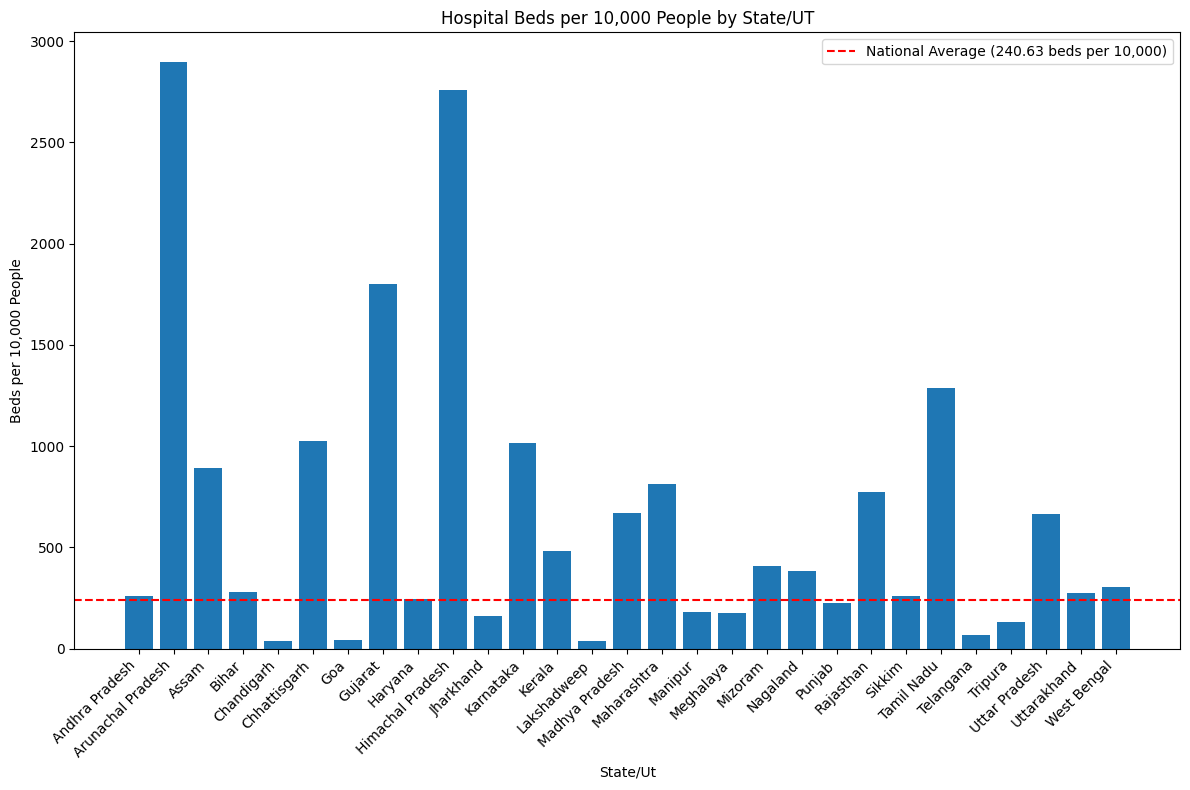

Three States/UTs with the least hospital beds per 10,000 people:
      State/Ut  Beds_per_10k
192  Jharkhand     25.406168
182  Jharkhand     27.580689
462    Tripura     28.364660


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the hospital data (from the cleaned data)
hospital_data = pd.read_csv('Clean_Data/all_hospitals.csv')

# Load population data for each state/UT (assumed to be in a separate CSV file)
# The CSV should have at least two columns: 'State/UT' and 'Population'
population_data = pd.read_csv('census.csv')

# Merge the two datasets on the 'State/UT' column
combined_data = pd.merge(hospital_data, population_data, on='State/Ut')

# Convert 'Hospitalbeds' and 'Population' columns to numeric
combined_data['Hospitalbeds'] = pd.to_numeric(combined_data['Hospitalbeds'], errors='coerce')
combined_data['Population'] = pd.to_numeric(combined_data['Population'], errors='coerce')

# Drop rows with NaN values (if any)
combined_data.dropna(subset=['Hospitalbeds', 'Population'], inplace=True)

# Calculate hospital beds per 10,000 people
combined_data['Beds_per_10k'] = (combined_data['Hospitalbeds'] / combined_data['Population']) * 10000

# Calculate the national average
national_avg = combined_data['Beds_per_10k'].mean()

# Create a bar chart to visualize the data
plt.figure(figsize=(12, 8))
plt.bar(combined_data['State/Ut'], combined_data['Beds_per_10k'])
plt.axhline(y=national_avg, color='r', linestyle='--', label=f'National Average ({national_avg:.2f} beds per 10,000)')
plt.xlabel('State/Ut')
plt.ylabel('Beds per 10,000 People')
plt.title('Hospital Beds per 10,000 People by State/UT')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

# Identify the three States/UTs with the least hospital beds per 10,000 people
lowest_states = combined_data.nsmallest(3, 'Beds_per_10k')

print("Three States/UTs with the least hospital beds per 10,000 people:")
print(lowest_states[['State/Ut', 'Beds_per_10k']])


# Problem Statement 13

In [62]:
import pandas as pd

hospital_data = pd.read_csv("government_hospitals.csv", header=[0, 1])
hospital_data.columns = ['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds',
                         'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated']
hospital_data.to_csv("updated_hospital_data.csv", index=False)
print(hospital_data.head())

             State/UT  Rural_Government_Hospitals  Rural_Government_Beds  \
0      Andhra Pradesh                         193                   6480   
1  Arunachal Pradesh*                         208                   2136   
2               Assam                        1176                  10944   
3               Bihar                         930                   6083   
4        Chhattisgarh                         169                   5070   

   Urban_Government_Hospitals  Urban_Government_Beds Last_Updated  
0                          65                  16658   01.01.2017  
1                          10                    268   31.12.2017  
2                          50                   6198   31.12.2017  
3                         103                   5936   31.12.2016  
4                          45                   4342   01.01.2016  


# Problem Statement 14

In [65]:
import pandas as pd
from datetime import datetime
import os

# Define function to fix State/UT names
def fix_state_name(name):
    # Add your logic to fix state names here
    return name

# Read the data from the CSV file
government_hospital_data = pd.read_csv("government_hospitals.csv")

# Update the "Last_Updated" column to the required format
government_hospital_data["Last_Updated"] = pd.to_datetime(government_hospital_data["As on"], format="%d.%m.%Y").dt.strftime("%Y-%m-%d")

# Fix State/UT names
government_hospital_data["State/UT"] = government_hospital_data["States/UTs"].apply(fix_state_name)

# Define the path to the Clean folder
clean_folder_path = "Clean/"

# Create the Clean folder if it doesn't exist
# Print success message

if not os.path.exists(clean_folder_path):
    os.makedirs(clean_folder_path)

# Save the updated data to a new CSV file in the Clean folder
government_hospital_data.to_csv(clean_folder_path + "government_hospital.csv", index=False)

# Print success message
print("Code executed successfully. Updated government hospital data saved to 'Clean/government_hospital.csv'.")

Code executed successfully. Updated government hospital data saved to 'Clean/government_hospital.csv'.
